Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as c
from ComputeDispRel import evaluate_LHW, evaluate_IBWs
import DispRel

Define plasma parameters

In [2]:
# electrons
B = 3
Te = 500*c.electron_volt
ne = 1e19

# ions (here deuterium and tritum)
ni = [0.5e19, 0.5e19]
Ti = [500*c.electron_volt, 500*c.electron_volt]
mi = [2*1836*c.m_e, 3*1836*c.m_e]
Zi = [1, 1]

# Calculate ion Larmor radius of first ion species (here deuterium)
vTD = np.sqrt(2.0*Ti[0]/mi[0])
omgcD = Zi[0]*c.e*B/mi[0]
rho_D = vTD/omgcD

Choose dispersion relation

In [3]:
# 'D_IBW'               standard electrostatic IBW (eq. (1) with K_sigma form eq. (3))
# 'D_IBW_modified'      modified electromagnetic IBW (eq. (25) with K_sigma form eq. (3))

# 'D_cold'              Cold Electromagntic lower hybrid wave (eq. (23))
# 'D_LH'                Electromagntic lower hybrid wave (eq. (26))
# 'D_LH_electrostatic'  Electrostatic lower hybrid wave (eq. (21))
# 'D_LH_approx'         Approximate dispersion relation for electromagnetic LH wave (eq. 27)

Evaluate and plot lower hybrid wave

In [6]:
# minimum and maximum wavenumber
k_min = 50
k_max = 8000

# k resolution
k_res = 1000

k_LH_cold, omg_LH_cold = evaluate_LHW(ne, ni, Te, Ti, B, mi, Zi, k_min, k_max, k_res, dispersion_relation='D_LH_cold')
k_LH_EM, omg_LH_EM = evaluate_LHW(ne, ni, Te, Ti, B, mi, Zi, k_min, k_max, k_res, dispersion_relation='D_LH')
k_LH_approx, omg_LH_approx = evaluate_LHW(ne, ni, Te, Ti, B, mi, Zi, k_min, k_max, k_res, dispersion_relation='D_LH_approx')
k_LH_ES, omg_LH_ES = evaluate_LHW(ne, ni, Te, Ti, B, mi, Zi, k_min, k_max, k_res, dispersion_relation='D_LH_electrostatic')

Evaluating D_LH_cold
Evaluating D_LH
Evaluating D_LH_approx
Evaluating D_LH_electrostatic


(16.0, 24.0)

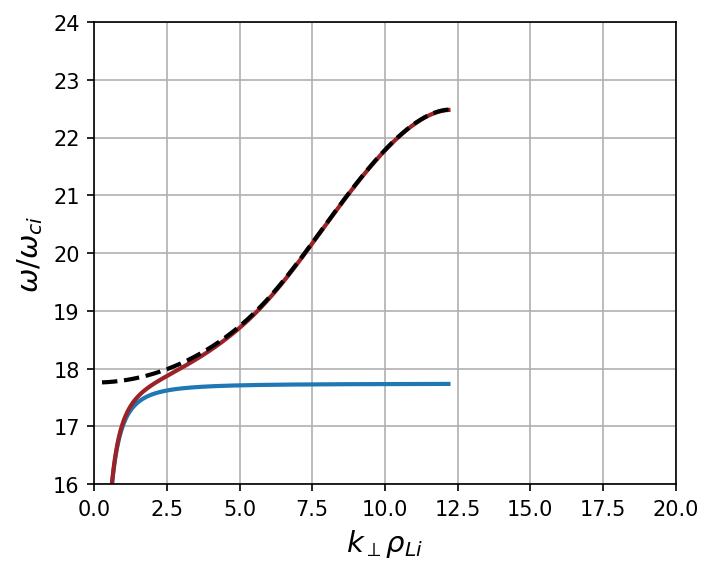

In [10]:
plt.figure(figsize=(5,4), dpi = 150)
plt.grid()
plt.plot(k_LH_cold*rho_D, omg_LH_cold/omgcD, linewidth=2, linestyle = '-', color='tab:blue')
plt.plot(k_LH_EM*rho_D, omg_LH_EM/omgcD, linewidth=2, linestyle = '-', color='#9B2226')
#plt.plot(k_LH_approx*rho_D, omg_LH_approx/omgcD, linewidth=2, linestyle = '-', color='#EE9B00')
plt.plot(k_LH_ES*rho_D, omg_LH_ES/omgcD, linewidth=2, linestyle = '--', color='k')
plt.xlabel(r'$k_\perp\rho_{Li}$',fontsize=14)
plt.ylabel(r'$\omega/\omega_{ci}$',fontsize=14)
plt.xlim(0,20)
plt.ylim(16, 24)

Evaluate and plot ion Bernstein waves

In [11]:
# minimum and maximum wavenumber
# maximum wavenumber must be well above the LH wave
k_min = 50
k_max = 15000

# k resolution
k_res = 2000

# minimum and maximum ion cyclotorn harmonic of the first ion species in the list
N_min = 16
N_max= 24

# evaluate wavenumbers
k_IBW, omg_IBW = evaluate_IBWs(ne, ni, Te, Ti, B, mi, Zi, k_min, k_max, k_res, N_min, N_max, dispersion_relation='D_IBW')
k_IBW_modified, omg_IBW_modified = evaluate_IBWs(ne, ni, Te, Ti, B, mi, Zi, k_min, k_max, k_res, N_min, N_max, dispersion_relation='D_IBW_modified')

Evaluating D_IBW


C:\Users\aclpe\AppData\Roaming\Python\Python310\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Lower hybrid branch is at the 26.0th ion cyclotron harmonic of ion species number 2
Evaluating D_IBW_modified
Lower hybrid branch is at the 26.0th ion cyclotron harmonic of ion species number 2


Text(0, 0.5, '$\\omega/\\omega_{cT}$')

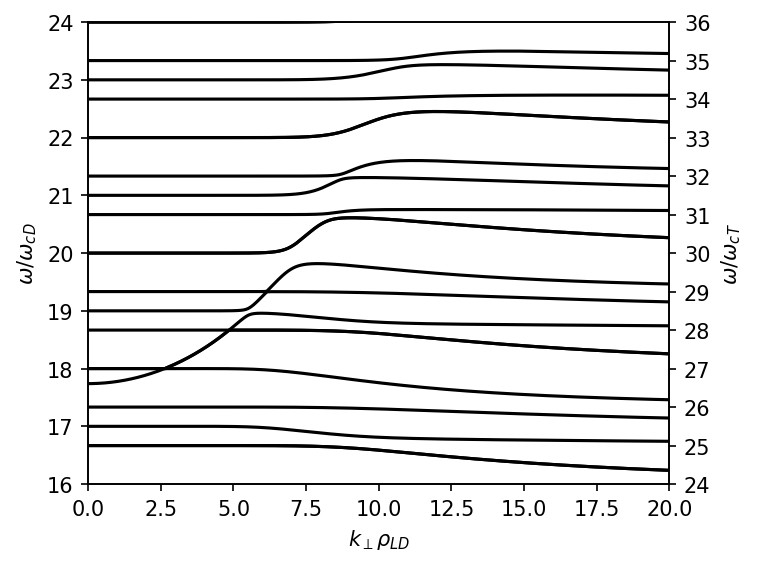

In [12]:
N_harmonics = N_max - N_min + 1
fig, ax1 = plt.subplots(figsize=(5,4), dpi = 150)
x_min = 0
x_max = 20
y_min = 16
y_max = 24

for i in range(len(omg_IBW[:,0])):
    plt.plot(k_IBW[:]*rho_D, np.array(omg_IBW[i,:])/omgcD, color='k', linewidth=1.5, linestyle = '-')

plt.xlabel(r'$k_\perp\rho_{LD}$')
plt.ylabel(r'$\omega/\omega_{cD}$')
plt.xlim(x_min,x_max)
plt.ylim(y_min, y_max)
plt.yticks(np.arange(y_min, y_max+1))
ax2 = ax1.twinx()  
ax2.set_ylim(y_min*mi[1]/mi[0], y_max*mi[1]/mi[0])
ax2.set_yticks(np.arange(y_min*mi[1]/mi[0], (y_max)*mi[1]/mi[0]+1))
ax2.set_ylabel(r'$\omega/\omega_{cT}$')

Text(0, 0.5, '$\\omega/\\omega_{cT}$')

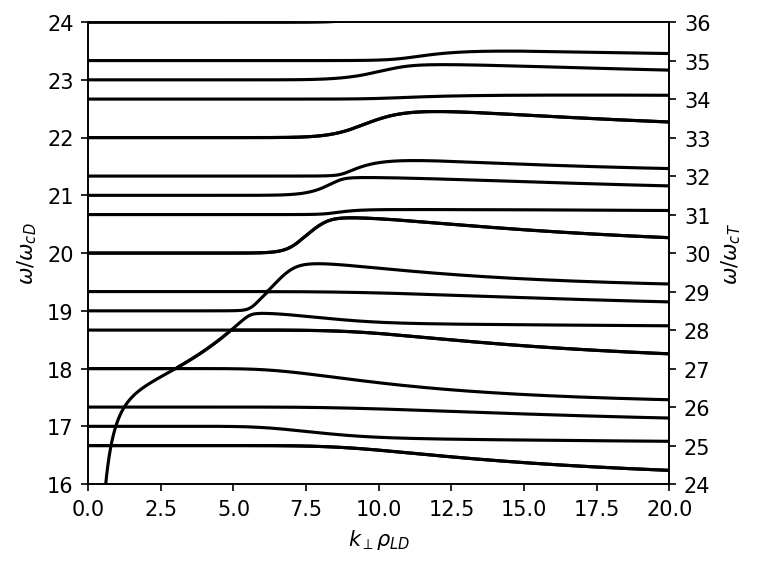

In [13]:
N_harmonics = N_max - N_min + 1
fig, ax1 = plt.subplots(figsize=(5,4), dpi = 150)
x_min = 0
x_max = 20
y_min = 16
y_max = 24

for i in range(len(omg_IBW[:,0])):
    plt.plot(k_IBW_modified[:]*rho_D, np.array(omg_IBW_modified[i,:])/omgcD, color='k', linewidth=1.5, linestyle = '-')

plt.xlabel(r'$k_\perp\rho_{LD}$')
plt.ylabel(r'$\omega/\omega_{cD}$')
plt.xlim(x_min,x_max)
plt.ylim(y_min, y_max)
plt.yticks(np.arange(y_min, y_max+1))
ax2 = ax1.twinx()  
ax2.set_ylim(y_min*mi[1]/mi[0], y_max*mi[1]/mi[0])
ax2.set_yticks(np.arange(y_min*mi[1]/mi[0], (y_max)*mi[1]/mi[0]+1))
ax2.set_ylabel(r'$\omega/\omega_{cT}$')